In [9]:
import pandas as pd
import numpy as np
import nltk

In [10]:
nmt = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv')
nmt.head(2)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [11]:
print('Maximum date for tweet creation : ',nmt['created_at'].max())
print('Minimum date for tweet creation : ',nmt['created_at'].min())

Maximum date for tweet creation :  2017-01-31 11:00:07
Minimum date for tweet creation :  2016-03-09 12:22:10


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

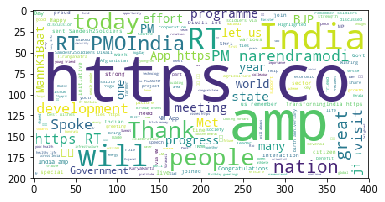

In [14]:
input_string = ' '.join(nmt['text'])
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

In [16]:
docs = nmt['text'].str.lower().str.replace('[^a-z ]','')

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

In [19]:
docs_clean = []
for doc in docs.head():
    words = doc.split(' ')
    #print(doc)
    #print(words)
    word_clean = []
    for word in words:
        if word not in stopwords:
            word_clean.append(stemmer.stem(word))
    doc_clean = ' '.join(word_clean)
    docs_clean.append(doc_clean)

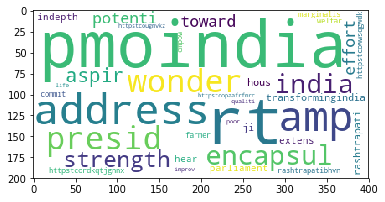

In [21]:
input_string = ' '.join(docs_clean)
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

In [22]:
docs = nmt['text'].str.lower().str.replace('[^a-z ]','')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2        rt pmoindia empow marginalis httpstcowwsqgwdk
3    rt pmoindia commit welfar farmer httpstcopaafr...
4    rt pmoindia improv qualiti life poor httpstcou...
Name: text, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 5)
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<3220x1229 sparse matrix of type '<class 'numpy.int64'>'
	with 24767 stored elements in Compressed Sparse Row format>

#### max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    >max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    >max_df = 25 means "ignore terms that appear in more than 25 documents".
    >The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

#### min_df is used for removing terms that appear too infrequently. For example:

    >min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    >min_df = 5 means "ignore terms that appear in less than 5 documents".
    >The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
labels = kmeans.predict(dtm)
centroids = kmeans.cluster_centers_ # Final centroid values

df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())

res = pd.DataFrame()
res = df_dtm

res['labels'] = labels

In [59]:
res.head()

,aadhaar,abeshinzo,abhiyan,absolut,access,accomplish,account,achiev,across,act,...,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngster,youth,zay,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
res['labels'].value_counts()

1    1844
2     762
3     356
0     258
Name: labels, dtype: int64

In [68]:
nmt['labels'] = labels

In [85]:
nmt[['text']][labels==0].head(2)
nm['text'].head(2)

16    RT @RashtrapatiBhvn: Resilience &amp; forbeara...
30    The @Akali_Dal_ &amp; @BJP4Punjab Government i...
Name: text, dtype: object

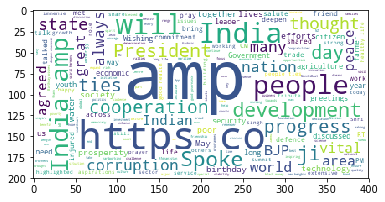

In [86]:
nm = nmt[['text']][labels==0]
input_string = ' '.join(nm['text'])
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

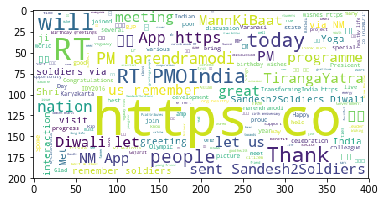

In [87]:
nm = nmt[['text']][labels==1]
input_string = ' '.join(nm['text'])
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

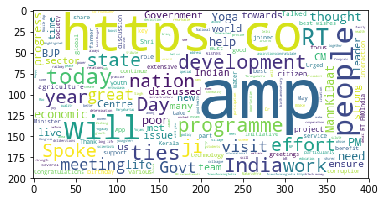

In [88]:
nm = nmt[['text']][labels==2]
input_string = ' '.join(nm['text'])
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

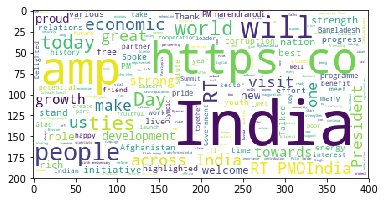

In [89]:
nm = nmt[['text']][labels==3]
input_string = ' '.join(nm['text'])
wc = WordCloud(background_color = 'white').generate(input_string)
plt.imshow(wc)

## Hotsar

In [10]:
import pandas as pd
import numpy as np
import nltk

In [11]:
hotstar = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv')
hotstar.head(2)

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [14]:
def get_sentiment(text):
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
hotstar['sentiment_vader'] = hotstar['Reviews'].apply(get_sentiment)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'],hotstar['sentiment_vader'])

0.5503661191371463